# Modelos de Regresión. End to End
## Predecir la calidad del vino
## data/winequality-red


In [142]:
# Decision Tree, Bagging, Pasting, RandomForest, ExtraTrees y AdaBoost
import pandas as pd
vinos = pd.read_csv('data/winequality-red.csv')

In [143]:
len(vinos)

1599

In [144]:
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [145]:
vinos['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [146]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [147]:
vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vinos.drop(columns=['quality']), vinos['quality'], test_size=0.2, random_state=1743)

In [149]:
y_train.value_counts(normalize=True)

quality
5    0.437842
6    0.395622
7    0.117279
4    0.032056
8    0.010164
3    0.007037
Name: proportion, dtype: float64

In [150]:
y_test.value_counts(normalize=True)

quality
6    0.412500
5    0.378125
7    0.153125
4    0.037500
8    0.015625
3    0.003125
Name: proportion, dtype: float64

In [151]:
from sklearn.model_selection import StratifiedShuffleSplit
X = vinos.drop(columns=["quality"])
y = vinos["quality"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1743)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [152]:
y_train.value_counts(normalize=True)

quality
5    0.437842
6    0.395622
7    0.117279
4    0.032056
8    0.010164
3    0.007037
Name: proportion, dtype: float64

In [153]:
y_test.value_counts(normalize=True)

quality
6    0.412500
5    0.378125
7    0.153125
4    0.037500
8    0.015625
3    0.003125
Name: proportion, dtype: float64

In [154]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800) # Al menos 20 vinos por hoja y maxima profundidad de 3, son meta o hiperparámetros y
# son agnósticos a los datos

In [155]:
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800)

In [156]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

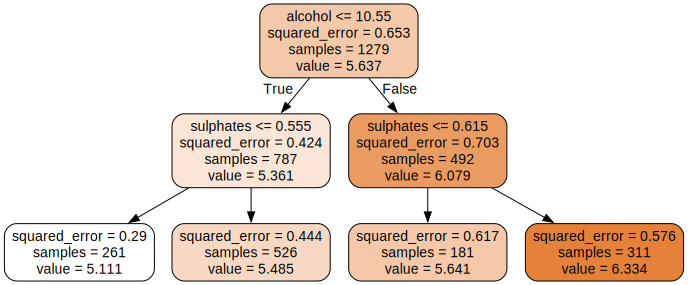

In [157]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [158]:
tree_reg.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [159]:
tree_reg.feature_importances_ 


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33691249,
       0.66308751])

In [160]:
tree_reg.get_params() # Obtenemos todos los hiperparametros del modelo

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 800,
 'splitter': 'best'}

In [161]:
tree_reg.feature_names_in_[tree_reg.feature_importances_>0]

array(['sulphates', 'alcohol'], dtype=object)

In [162]:
pd.DataFrame(tree_reg.predict(test_set))[0].unique() # Esto son los valores de las hojas (siempre tiene que ser asi)

array([5.48479087, 5.11111111, 6.33440514, 5.64088398])

In [163]:
((tree_reg.predict(train_set) - train_y_set)**2).mean()

0.4691441972551055

In [164]:
((tree_reg.predict(test_set) - test_y_set)**2).mean()

0.5542531914391565

In [165]:
((train_y_set.mean() - test_y_set)**2).mean()

0.6453090375225954

In [166]:
for d in range(1,21):
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_leaf=20, random_state=800)
    tree_reg.fit(train_set,train_y_set)
    print("Error train para profundidad",d)
    print(((tree_reg.predict(train_set)-train_y_set)**2).mean())
    print("Error test para profundidad",d)
    print(((tree_reg.predict(test_set)-test_y_set)**2).mean())
    print("*"*100)

Error train para profundidad 1
0.5312143463938362
Error test para profundidad 1
0.5605489151199569
****************************************************************************************************
Error train para profundidad 2
0.4691441972551055
Error test para profundidad 2
0.5542531914391565
****************************************************************************************************
Error train para profundidad 3
0.42325274363114185
Error test para profundidad 3
0.5225263094066886
****************************************************************************************************
Error train para profundidad 4
0.3884420083931524
Error test para profundidad 4
0.5356715537377699
****************************************************************************************************
Error train para profundidad 5
0.3512410322658542
Error test para profundidad 5
0.5257746014567471
****************************************************************************************************

In [167]:
from sklearn.ensemble import RandomForestRegressor
rnd_frt = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_leaf=30, max_samples=600, oob_score=True) # 500 arboles con 600 vinos, boostrap (true por default) se pueden repetir las muestras,
# 30 muestras por hoja minima, el oob score: hace un test por default, con los datos que no ha visto en este caso tenemoms 600 muestras que ve y tenemos  unos 1700 en total por lo tanto
# utiliza los vinos que no ha visto como test, a efectos de entrenar el modelo no afecta pero si lo ponemos a true podemos acceder lgo a esta propiedad para determinar resultados.

In [168]:
rnd_frt.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=3, max_samples=600, min_samples_leaf=30,
                      n_estimators=500, oob_score=True)

In [169]:
rnd_frt.estimators_samples_[0] # para el primer arbol ha introducido al azar los siguientes vinos: (el index de las muestras)

array([ 918,  300,  706,  774,  581,  956,  839, 1155,  912, 1261,  368,
        428,  687, 1211,  665,  798,  433,  857,  429,   59,  554,  223,
        824,  309,  573, 1212,  918,  765,  367,  227,  859,  123,  714,
       1190,  196, 1045,  422,  297,   88,  749, 1109,  682, 1038,  619,
        277, 1259, 1026,  553, 1263, 1031, 1034,  876, 1188,  482,  146,
       1057,  327, 1133,  106, 1080,  633,  135,   81,  498,  456,  293,
       1140, 1201, 1249,  553, 1109,  484,  855,  113,  263, 1212, 1045,
        286,   75,  818,  665, 1224,  387,  761, 1185,  724,  230,  903,
        126, 1086,   68, 1140, 1222,  346,  344,  616,  286, 1159,  606,
        672, 1032,  503,  597,  201,  584,  709,  447,  580, 1132,   97,
        842,  329, 1043, 1252,  123,  482,  146,  284,   99, 1202,  448,
       1087, 1251,  478,  439,  906, 1167,  506, 1098,  706,  296,  588,
        227, 1212,  262,  706,  943,   14,  671,  483,  871, 1124,  211,
        729,  335,  852,  432,  586, 1062,  660,  3

In [170]:
pd.DataFrame(rnd_frt.estimators_samples_[0]).duplicated().sum() # cantidad de repetidos

127

In [171]:
rnd_frt.oob_score_ # esto es la media del mean square error de todos los mean_square_error de cada arbol

0.3615957242141864

In [172]:
((train_y_set - rnd_frt.predict(train_set))**2).mean()

0.389132288672353

In [173]:
((test_y_set - rnd_frt.predict(test_set))**2).mean()

0.4442204080504206

In [174]:
rnd_frt_2 = RandomForestRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, oob_score=True)

In [175]:
rnd_frt_2.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=6, max_samples=1279, min_samples_leaf=30,
                      n_estimators=5000, oob_score=True)

In [176]:
((train_y_set - rnd_frt_2.predict(train_set))**2).mean()

0.3350411258329506

In [177]:
((test_y_set - rnd_frt_2.predict(test_set))**2).mean()

0.429947189899227

In [178]:
importances = pd.DataFrame(rnd_frt_2.feature_importances_).T
importances.columns = train_set.columns

In [179]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.01543,0.119204,0.010027,0.005072,0.017201,0.01188,0.060379,0.016569,0.021034,0.216905,0.506299


In [180]:
vinos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [181]:
from sklearn.ensemble import ExtraTreesRegressor
ext_frt = ExtraTreesRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, oob_score=True, bootstrap=True) # aqui el bootstrap es false por defecto
ext_frt.fit(train_set, train_y_set)
# El extra coge una muestra aleatoria de features y hace el arbol, asi vemos que features (columnas) son mas importantes

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_samples=1279,
                    min_samples_leaf=30, n_estimators=5000, oob_score=True)

In [182]:
ext_frt.oob_score_

0.35357195301376976

In [183]:
((train_y_set - ext_frt.predict(train_set))**2).mean()

0.4038784358807999

In [184]:
((test_y_set - ext_frt.predict(test_set))**2).mean()

0.4414266215005854

In [185]:
importances = pd.DataFrame(ext_frt.feature_importances_).T
importances.columns = train_set.columns

In [186]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.01924,0.17851,0.046828,0.002191,0.004983,0.008896,0.049467,0.026241,0.012709,0.133478,0.517456


In [198]:
from sklearn.ensemble import ExtraTreesRegressor
ext_frt_2 = ExtraTreesRegressor(n_estimators=5000, max_depth=6, max_features=4, min_samples_leaf=30, max_samples=1279, oob_score=True, bootstrap=True, random_state=42) # aqui el bootstrap es false por defecto
ext_frt_2.fit(train_set, train_y_set)
# Establecemos unas features

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_features=4,
                    max_samples=1279, min_samples_leaf=30, n_estimators=5000,
                    oob_score=True, random_state=42)

In [200]:
importances = pd.DataFrame(ext_frt.feature_importances_).T
importances.columns = train_set.columns
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.01924,0.17851,0.046828,0.002191,0.004983,0.008896,0.049467,0.026241,0.012709,0.133478,0.517456


In [201]:
ext_frt_2.oob_score_

0.256241343472264

In [202]:
((train_y_set - ext_frt_2.predict(train_set))**2).mean()

0.476367971927469

In [203]:
((test_y_set - ext_frt_2.predict(test_set))**2).mean()

0.4985178996375029

In [214]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, min_samples_leaf=30),n_estimators=5000, random_state=42, learning_rate=0.05)
ada.fit(train_set, train_y_set)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2,
                                                  min_samples_leaf=30),
                  learning_rate=0.05, n_estimators=5000, random_state=42)

In [215]:
((train_y_set - ada.predict(train_set))**2).mean()

0.4090772811224121

In [216]:
((test_y_set - ada.predict(test_set))**2).mean()

0.4634437107324569

In [217]:
importances = pd.DataFrame(ext_frt.feature_importances_).T
importances.columns = train_set.columns

In [218]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.01924,0.17851,0.046828,0.002191,0.004983,0.008896,0.049467,0.026241,0.012709,0.133478,0.517456
